# Convert Intan (.RHD) to Binary (.BIN)

Converts Intan files into Binary files. If recording with Intan and not Datawave, run this before running `marshfindbestdepths.ipynb`

By using the Intan data format, we circumvent the Datawave export problem and data can be loaded into SpikeInterface much more quickly.

If running with `GENERATEALL=True`, quickly get a list of all unconverted Intan files with `findnewtxt.ipynb`

## Run Code on HPC

### Run 1 File

In [1]:
# Save the notebook as a .py, and run on HPC
!jupyter nbconvert --to script marshmountainsort.ipynb --TagRemovePreprocessor.remove_cell_tags='{"note"}' --output-dir ./pys
!sbatch --mem=10G /mnt/isilon/marsh_single_unit/MarshMountainSort/MarshMountainSort.sh
!echo "COMPLETE"

[NbConvertApp] Converting notebook marshmountainsort.ipynb to script
[NbConvertApp] Writing 25342 bytes to pys/marshmountainsort.py
Submitted batch job 21249097
COMPLETE


### Generate All Binaries

In [127]:
# Same as above, but manually run if GENERATEALL is True. Iterates through all files
# Before running, remember to reset the filecount to 0. See cell under GENERATEALL

n_generateall = 120  # > Number of TXTs * 3 + 5 for safety

for i in range(n_generateall):
    !jupyter nbconvert --to script marshmountainsort.ipynb --TagRemovePreprocessor.remove_cell_tags='{"note"}' --output-dir ./pys
    !sbatch --mem=20G -t 24:00:00 /mnt/isilon/marsh_single_unit/MarshMountainSort/MarshMountainSort.sh
    !sleep 15

[NbConvertApp] Converting notebook marshmountainsort.ipynb to script
[NbConvertApp] Writing 27715 bytes to pys/marshmountainsort.py
Submitted batch job 23033900
[NbConvertApp] Converting notebook marshmountainsort.ipynb to script
[NbConvertApp] Writing 27715 bytes to pys/marshmountainsort.py
Submitted batch job 23033904
[NbConvertApp] Converting notebook marshmountainsort.ipynb to script
[NbConvertApp] Writing 27715 bytes to pys/marshmountainsort.py
Submitted batch job 23033906
[NbConvertApp] Converting notebook marshmountainsort.ipynb to script
[NbConvertApp] Writing 27715 bytes to pys/marshmountainsort.py
Submitted batch job 23033907
[NbConvertApp] Converting notebook marshmountainsort.ipynb to script
[NbConvertApp] Writing 27715 bytes to pys/marshmountainsort.py
Submitted batch job 23033910
[NbConvertApp] Converting notebook marshmountainsort.ipynb to script
[NbConvertApp] Writing 27715 bytes to pys/marshmountainsort.py
Submitted batch job 23033912
[NbConvertApp] Converting notebook

## Analysis Constants

In [1]:
# If True, uses rec_folders to get file names and run scripts. Code will ignore rec_folder and tetrode_name.
# Set True if generating all .bins or figures.
# Remember to reset filecount.pk! See below scripts
GENERATEALL = False

# If you want to convert .txt into .bin (Warning: time consuming!!! ~4hrs)
# Set True when you want to create/regenerate .bins. If so, run on HPC to save time
# PARSENEW = True
# Saves converted .txt files to .npy.gz instead of .bin (to save space). Should always be True
SAVECOMP = True
# If a .npy.gz is present alongside .bin, use the .npy.gz
# FAVORCOMP = True


In [2]:
from pathlib import Path

# Name of the TXT folder containing 1 .txt file with tetrodes. Ignored if GENERATEALL
rec_folder = "435-GCG-WT-F Test LFP microdrive 8-8-24_240808_143417"

# Choose between analyzing ca3, ca1s, or ca1o. Ignored if GENERATEALL
tetrode_name = ['ca3', 'ca1s', 'ca1o'][2]


# GENERATEALL: Name of every binary/TXT file. Can be pulled with findnewtxt.ipynb
rec_folders = ["1238_Exp_3 half turn after turning_5_3_17",
                "766_WT_Final Protocol Morning 6th half turn +1_4 _recorded_ after turning_7-28-2017",
                "766_WT_5th half turn_recorded after turning_7-26-2017",
                "1269_EXP_4th half turn_recorded after recovery_7-31-2017",
                "766_WT_Final Protocol Night 6th half turn +1_4 _recorded after turning_7-28-2017",
                "766_WT_Final Protocol Morning 6th half turn_recorded after turning_7-27-2017",
                "1244_Bl6_5th half turn_recorded after turning_ 7-02-2017",
                "1269_EXP_Final Protocol 6th half + 1_4th quarter turn Morning_recorded after recovery_8-3-2017",
                "1236_Exp_6 half turn after turning_Day1 night 5_5_17",
                "766_WT_3rd half turn_recorded after turning_7-24-2017",
                "1244_Bl6_Final Protocol_6th half turn_recorded after turning_Day1 morning 7-03-2017",
                "1269_EXP_5th half turn_recorded after recovery_8-1-2017",
                "1269_EXP_3rd half turn_recorded after recovery_7-28-2017",
                "1269_ Exp_2nd 12 hour recording_8-9-17_Spike Wave-0 - Copy",
                "1236_Exp_3 half turn after turning_5_3_17",
                "766_WT_Final Protocol Night 6th half turn+2_4_recorded after turning_7-31-2017",
                "1269_EXP_2nd half turn_recorded after recovery_7-27-2017",
                "1244_Bl6_1st half turn_recorded after turning_6-28-2017",
                "1236_Exp_4 half turn after turning_5_4_17",
                "766_WT_Final Protocol Morning 6th half turn+3_4_recorded after turning_8-02-2017",
                "1269_EXP_Final Protocol 6th half turn Morning_recorded after recovery_8-2-2017",
                "1236_Expanded_2 half turns_after turning_05-02-17",
                "1269_EXP_Final Protocol 6th half + 1_4th quarter turn Night_recorded after recovery_8-3-2017",
                "1244_Bl6_2nd half turn_recorded after turning_ 6-29-2017",
                "1244_Bl6_4th half turn_recorded after turning_ 7-01-2017",
                "1236_Exp_6 half turn after turning_Day1 morning 5_5_17",
                "1238_Exp_5 half turn after turning_5_5_17",
                "1238_Exp_4 half turn after turning_5_4_17",
                "766_WT_Final Protocol Night 6th half turn_recorded after turning_7-27-2017",
                "1269_EXP_Final Protocol 6th half turn Night_recorded after recovery_8-2-2017",
                "1236_Exp_5 half turn after turning_5_5_17",
                "766_WT_Final Protocol Morning 6th half turn+2_4_recorded after turning_7-31-2017",
                "1238_Exp_6 half turn after turning_ Day 1 morning 5_5_17",
                "1269_ Exp_3rd 12 hour recording_8-10-17_Spike Wave-0 - Copy",
                "1238_Expanded_2 half turns_after turning_05-02-17",
                "1244_Bl6_3rd half turn_recorded after turning_ 6-30-2017",
                "1238_Exp_6 half turn after turning_ Day 1 night 5_5_17",
                "766_WT_4th half turn_recorded after turning_7-25-2017",
                "766_WT_2nd half turn_recorded after turning_7-21-2017"]
print(len(rec_folders))

# GENERATEALL: Name of every tetrode position
tetrode_names = ['ca3', 'ca1s', 'ca1o']


# Define Paths and folders used in analysis.
base_folder_path = Path(f'/mnt/isilon/marsh_single_unit/MarshMountainSort')
# raw_txts_folder = 'rawtxts'
binary_folder = 'bins-rhd'
intan_folder = 'rhds'
temporary_folder = 'temp'
# output_folder = 'output'
filecount_name = 'filecount-intans.pk'


39


## Import Dependencies

In [3]:
from tempfile import TemporaryDirectory
import numpy as np
import pkg_resources
pkg_resources.require('matplotlib==3.8.3')
import matplotlib.pyplot as plt
import os
import warnings
import time
import sys
import pickle
import gzip

import mountainsort5 as ms5
from mountainsort5.util import create_cached_recording
import spikeinterface.core as si
import spikeinterface.extractors as se
import spikeinterface.preprocessing as spre
# import spikeinterface.sorters as ss
# import spikeinterface.postprocessing as spost
# import spikeinterface.qualitymetrics as sqm
# import spikeinterface.exporters as sexp
# import spikeinterface.comparison as scmp
# import spikeinterface.curation as scur
# import spikeinterface.sortingcomponents as sc
# import spikeinterface.widgets as sw
# import pyedflib
# import sonpy
# import zugbruecke
import probeinterface as pi
from probeinterface.plotting import plot_probe_group, plot_probe
import ffmpeg
# plt.rcParams(['animation.ffmpeg_path']) = ''
plt.rcParams['figure.dpi'] = 150


/mnt/isilon/marsh_single_unit/MarshMountainSort/venv/lib64/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## `GENERATEALL`: Get Filename and Step Filecount 

In [4]:
fcount_file_path = base_folder_path / filecount_name
print(f'Path for filecount:\n\t{fcount_file_path}')

def reset_filecount():
    with open(fcount_file_path, 'wb') as file:
        pickle.dump(0, file, protocol=pickle.HIGHEST_PROTOCOL)

def step_filecount():
    with open(fcount_file_path, 'rb') as file:
        out = pickle.load(file)
    out += 1
    with open(fcount_file_path, 'wb') as file:
        pickle.dump(out, file, protocol=pickle.HIGHEST_PROTOCOL)
        
def get_filecount():
    with open(fcount_file_path, 'rb') as file:
        out = pickle.load(file)
        return out

def get_file(n):
    return rec_folders[n // 3], tetrode_names[n % 3]
    

Path for filecount:
	/mnt/isilon/marsh_single_unit/MarshMountainSort/filecount-intans.pk


In [5]:
# RUN BEFORE GENERATEALL. Reset the filecount to 0.
# This cell will be ignored when converting to .py executable, so to not reset filecount every iteration of loop
if GENERATEALL:
    print(f"Filecount before was {get_filecount()}")
    reset_filecount()
    print(f"Filecount was reset to {get_filecount()}")

In [6]:
##### DO NOT run this cell after resetting filecount. This will step filecount by 1! #####
# If generating all figures, read folder and tetrode name and step filecount
print("=" * 50)
if GENERATEALL:
    rec_folder, tetrode_name = get_file(get_filecount())
    print(f"\tFILECOUNT: {get_filecount()}")
    
    for i in range(len(tetrode_names)):
        step_filecount() # Skip 3 to next file, ignoring tetrodes
        

print(f"\tREC_FOLDER: {rec_folder}\n\tTETRODE_NAME: {tetrode_name}")
print("=" * 50)

	REC_FOLDER: 435-GCG-WT-F Test LFP microdrive 8-8-24_240808_143417
	TETRODE_NAME: ca1o


## Load .txt and Convert to .bin

In [7]:
intan_folder_path = base_folder_path / intan_folder / rec_folder
bin_folder_path = base_folder_path / binary_folder / rec_folder
temp_folder_path = base_folder_path / temporary_folder

intan_file = None
for file in os.listdir(intan_folder_path):
    if file.endswith(".rhd"):
        intan_file = Path(file)
        break
if intan_file is None:
    warnings.warn("No .RHD file found!")
    intan_file = ""

intan_file_path = intan_folder_path / intan_file
bin_file_path = bin_folder_path / f"{rec_folder}.bin"
bin_file_path_ca3 = bin_folder_path / f"{rec_folder}_ca3.bin"
bin_file_path_ca1s = bin_folder_path / f"{rec_folder}_ca1s.bin"
bin_file_path_ca1o = bin_folder_path / f"{rec_folder}_ca1o.bin"

# Report the PLX file
print(f'.RHD to be used:\n\t{intan_file_path}')
print(f'Path for .BIN to be saved:\n\t{bin_file_path}')
print(f'Path for cached files to be saved:\n\t{temp_folder_path}')


.RHD to be used:
	/mnt/isilon/marsh_single_unit/MarshMountainSort/rhds/435-GCG-WT-F Test LFP microdrive 8-8-24_240808_143417/435-GCG-WT-F Test LFP microdrive 8-8-24_240808_143417.rhd
Path for .BIN to be saved:
	/mnt/isilon/marsh_single_unit/MarshMountainSort/bins-rhd/435-GCG-WT-F Test LFP microdrive 8-8-24_240808_143417/435-GCG-WT-F Test LFP microdrive 8-8-24_240808_143417.bin
Path for cached files to be saved:
	/mnt/isilon/marsh_single_unit/MarshMountainSort/temp


In [51]:
def get_channel_assignments(rectype):
    assert rectype in ['eeg', 'tetrodes'], "rectype should be 'eeg' or 'tetrodes'"

    if rectype == 'eeg':
        return ['L-AudCtx', 'L-VisCtx', 'L-Barrel', 'L-MotCtx',
                'R-MotCtx', 'R-Barrel', 'R-VisCtx', 'R-AudCtx']
    else:
        return ['ca3L', 'ca3L', 'ca3L', 'ca3L',
                'ca1L', 'ca1L', 'ca1L', 'ca1L',
                'ca1R', 'ca1R', 'ca1R', 'ca1R',
                'ca3R', 'ca3R', 'ca3R', 'ca3R', ]

# Convert uint16 datatype to float32 by rescaling
# See https://spikeinterface.readthedocs.io/en/latest/tutorials/extractors/plot_2_working_with_unscaled_traces.html
intan_rec = se.read_intan(intan_file_path, stream_name='RHD2000 amplifier channel', use_names_as_ids=True)

display(intan_rec)
intan_rec.get_channel_ids()

IntanRecordingExtractor: 8 channels - 25.0kHz - 1 segments - 7,500,032 samples 
                         300.00s (5.00 minutes) - uint16 dtype - 114.44 MiB
  file_path: /mnt/isilon/marsh_single_unit/MarshMountainSort/rhds/435-GCG-WT-F Test LFP microdrive 8-8-24_240808_143417/435-GCG-WT-F Test LFP microdrive 8-8-24_240808_143417.rhd

array(['A-009', 'A-010', 'A-014', 'A-015', 'A-016', 'A-017', 'A-021',
       'A-022'], dtype='<U64')

In [52]:

# Remove existing .zarr directory if it exists
if os.path.exists(f"{bin_folder_path}.zarr"):
    shutil.rmtree(f"{bin_folder_path}.zarr", ignore_errors=True)

# intan_rec = si.generate_recording_by_size(10, num_channels=16) # Testing save speed


tstart = time.time()
intan_rec.save(format='zarr', folder=bin_folder_path, dtype=np.float32, progress_bar=True, mp_context='spawn')
tend = time.time()
print(f"Time elapsed to save compressed Intan recording: {tend-tstart} s")

write_zarr_recording with n_jobs = 1 and chunk_size = 25000


write_zarr_recording: 100%|###########################| 301/301 [01:23<00:00,  3.62it/s]


Time elapsed to save compressed Intan recording: 83.54232239723206 s


In [45]:
def blocks(files, size=65536):
    while True:
        b = files.read(size)
        if not b: break
        yield b

if PARSENEW:
    tstart = time.time()
    with open(txt_file_path, "r", encoding="utf-8", errors='ignore') as f:
        nlines = sum(bl.count("\n") for bl in blocks(f))
    tend = time.time()
    print(f"Time elapsed: {tend - tstart} seconds")

In [46]:
# Read TXT file and convert to Binary

ncol = 16 # Number of channels in full recording, not including time column
ncol_tet = 4 # Number of channels in 1 tetrode
nheader = 12 # Number of lines in Dwave block header
f_s = 25000

if PARSENEW:
    ncol_arr = np.arange(ncol + 1) # including time column
    nrblocks = nlines / (f_s + nheader) # 1 recording block has header + 1s of recording data
    print(f"Number of recording blocks: {nrblocks}")
    nrblocks = round(nrblocks)


In [47]:
if PARSENEW:
    txtblocks = []
    tstart = time.time()
    
    for i in range(nrblocks):
        txtblocks.append(np.loadtxt(txt_file_path, dtype=np.float32, delimiter='\t', usecols=ncol_arr, skiprows=(f_s+nheader)*i+nheader, max_rows=f_s))
        if i % 50 == 0:
            print(f"Processing block {i}..")
    
    txtdata = np.concatenate(txtblocks, axis=0)
    print(txtdata.shape)

    tend = time.time()
    print(f"Time elapsed: {tend - tstart} seconds")

In [48]:
print(bin_folder_path)
if PARSENEW:
    # if os.path.exists(bin_folder_path):
    #     shutil.rmtree(bin_folder_path, ignore_errors=True)
    os.makedirs(bin_folder_path, exist_ok=True)

/home/dongjp/Documents/marshmountainsort/bins/1176_WT Bl6_6 half turns + 1-8th of full turn_right after turning_02-10-17


In [49]:
def save_comp(arr, filepath):
    fcomp_name = filepath.parent / f"{filepath.stem}.npy.gz"
    with gzip.GzipFile(fcomp_name, "w") as fcomp:
        np.save(file=fcomp, arr=arr)
    print(f"Compressed: {fcomp_name.name}")


if PARSENEW:
    tstart = time.time()
    txtdata_notime = txtdata[:, 1:] # Discard time

    # Reorder data because of weird Datawave order convention.
    # Datawave sorts alphabetically, so 10-15 are before 2 and after 1
    # permutation = [0, 1, 10, 11, 12, 13, 14, 15, 2, 3, 4, 5, 6, 7, 8, 9]
    # idx = np.empty_like(permutation)
    # idx[permutation] = np.arange(len(permutation))
    # txtdata_notime[:] = txtdata_notime[:, idx]

    print(txtdata_notime.shape)
    print("Saving files..")
    # txtdata_notime = np.transpose(txtdata_notime)
    
    txtdata_ca3 = txtdata_notime[:, 0:4]
    txtdata_ca1o = txtdata_notime[:, 4:8]
    txtdata_ca1s = txtdata_notime[:, 10:14]

    if SAVECOMP:
        save_comp(txtdata_notime, bin_file_path)
        save_comp(txtdata_ca3, bin_file_path_ca3)
        save_comp(txtdata_ca1o, bin_file_path_ca1o)
        save_comp(txtdata_ca1s, bin_file_path_ca1s)
    else:
        txtdata_notime.tofile(bin_file_path) # Will save in row major order 'C'
        txtdata_ca3.tofile(bin_file_path_ca3)
        txtdata_ca1o.tofile(bin_file_path_ca1s)
        txtdata_ca1s.tofile(bin_file_path_ca1o)

    tend = time.time()
    print(f"Binary files saved. Time elapsed: {tend - tstart} seconds")
    print("=" * 50)

In [50]:
if not MAKEFIGS:
    print("MAKEFIGS is false. Finishing program.")
    time.sleep(3)
    sys.exit()

## Define Probe Groups

[(0, 0) (0, 1) (0, 2) (0, 3)]


<Figure size 960x720 with 0 Axes>

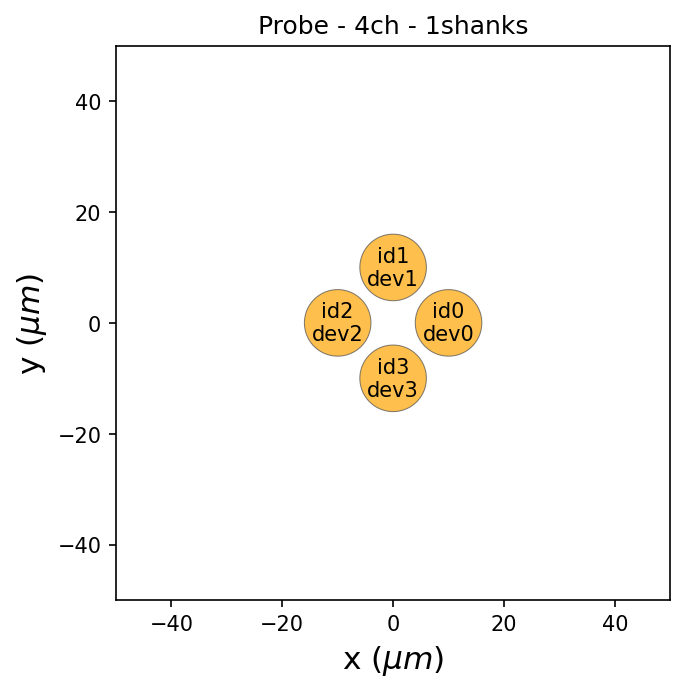

In [51]:
pg = pi.ProbeGroup()

tetrode_x = np.array([-2500, 2000, -2000, 2500 ]) # um
tetrode_y = np.array([-480, 0, 0, -480]) # um
tetrode_z = np.array([-1000, 0, 0, -1000]) # um
global_device_channel_indices = [0, 1, 2, 3, # corresponds to Datawave channel
                                 4, 5, 6, 7,
                                 10, 11, 12, 13,
                                 -1, -1, -1, -1]
plot_xlim = np.array([-3000, 3000])
plot_ylim = np.array([-1000, 1000])
plot_zlim = np.array([-1500, 500])

### TEST MULTIPLIER. VISUALIZATION PURPOSES ONLY
testmult = None
if testmult is not None:
    warnmessage = f'testmult is not None. Distances are {testmult}x smaller!'
    warnings.warn(warnmessage)
    tetrode_x = tetrode_x * testmult
    tetrode_y = tetrode_y * testmult
    tetrode_z = tetrode_z * testmult
    plot_xlim = plot_xlim * testmult
    plot_ylim = plot_ylim * testmult
    plot_zlim = plot_zlim * testmult
### TEST MULTIPLIER

fig, ax1 = plt.subplots(1, 1, subplot_kw={'projection': '3d'})
fig, ax2 = plt.subplots(1, 1)
for i in range(4):
    tetrode = pi.generate_tetrode()

    if not SINGLETETRODE:
        tetrode_3d = tetrode.to_3d('xy')
        tetrode_3d.move([tetrode_x[i], tetrode_y[i], tetrode_z[i]])
        tetrode_3d.set_device_channel_indices(global_device_channel_indices[i*4:i*4+4])
        tetrode_3d.set_contact_ids(np.arange(i*4, i*4+4, 1))
        tet_add = tetrode_3d
        
        tetrode_3dproj = tetrode_3d.to_2d('xy')
        tetrode_3dproj.set_device_channel_indices(global_device_channel_indices[i*4:i*4+4])
        tetrode_3dproj.set_contact_ids(np.arange(i*4, i*4+4, 1))
        
        plot_probe(tet_add, ax=ax1)
        plot_probe(tetrode_3dproj, ax=ax2, with_device_index=True, with_contact_id=True)
    else:
        tetrode.set_device_channel_indices(np.arange(4))
        tetrode.set_contact_ids(np.arange(4))
        tet_add = tetrode
        
        plot_probe(tet_add, ax=ax2, with_device_index=True, with_contact_id=True)

    pg.add_probe(tet_add)

    if SINGLETETRODE:
        break

print(pg.get_global_device_channel_indices())
if not SINGLETETRODE:
    # ax1.set_xlim(plot_xlim)
    # ax1.set_ylim(plot_ylim)
    # ax1.set_zlim(plot_zlim)
    ax2.set_xlim(plot_xlim)
    ax2.set_ylim(plot_ylim)
else:
    ax1.remove()
plt.show()

## Load .bin

In [52]:
# Load binaries. If SINGLETETRODE = False, load all tetrodes regardless of tetrode_name
if not SINGLETETRODE:
    full_raw_rec = se.read_binary(bin_file_path, sampling_frequency=f_s, dtype=np.float32, num_channels=ncol, gain_to_uV=1000)
else:
    if tetrode_name == 'ca3':
        tet_bin_path = bin_file_path_ca3
    elif tetrode_name == 'ca1s':
        tet_bin_path = bin_file_path_ca1s
    elif tetrode_name == 'ca1o':
        tet_bin_path = bin_file_path_ca1o
    else:
        raise Exception(f'Unrecognized tetrode_name: {tetrode_name}')

    tet_fcomp_path = tet_bin_path.parent / f"{tet_bin_path.stem}.npy.gz"
    if tet_fcomp_path.is_file() and FAVORCOMP:
        print("Using .NPY.GZ file..")
        with tempfile.NamedTemporaryFile(dir=tet_bin_path.parent) as tmp:
            fcomp = gzip.GzipFile(tet_fcomp_path, "r")
            bin_arr_recov = np.load(fcomp)
            bin_arr_recov.tofile(tmp)

            full_raw_rec = se.read_binary(tmp.name, sampling_frequency=f_s, dtype=np.float32, num_channels=ncol_tet, gain_to_uV=1000)
            full_raw_rec = full_raw_rec.set_probes(pg)
    else:
        print("Using .BIN file..")
        full_raw_rec = se.read_binary(tet_bin_path, sampling_frequency=f_s, dtype=np.float32, num_channels=ncol_tet, gain_to_uV=1000)
        full_raw_rec = full_raw_rec.set_probes(pg)

print(full_raw_rec)
print(full_raw_rec.get_probegroup())
full_raw_rec.get_probegroup().to_dataframe(complete=True)

Using .NPY.GZ file..
BinaryRecordingExtractor: 4 channels - 25.0kHz - 1 segments - 24,025,000 samples 
                          961.00s (16.02 minutes) - float32 dtype - 366.59 MiB
  file_paths: ['/home/dongjp/Documents/marshmountainsort/bins/1176_WT Bl6_6 half turns + 1-8th of full turn_right after turning_02-10-17/tmpgfwytxlc']


,probe_index,x,y,contact_shapes,radius,shank_ids,contact_ids,device_channel_indices,si_units,plane_axis_x_0,plane_axis_x_1,plane_axis_y_0,plane_axis_y_1
0,0,1.000000e+01,0.000000e+00,circle,6.0,,0,0,um,1.0,0.0,0.0,1.0
1,0,6.123234e-16,1.000000e+01,circle,6.0,,1,1,um,1.0,0.0,0.0,1.0
2,0,-1.000000e+01,1.224647e-15,circle,6.0,,2,2,um,1.0,0.0,0.0,1.0
3,0,-1.836970e-15,-1.000000e+01,circle,6.0,,3,3,um,1.0,0.0,0.0,1.0


In [53]:
recording = full_raw_rec # load your recording using SpikeInterface
freq_min = 400 # Hz
freq_max = 8064 # Hz

# Preprocess recording
recording_prep = recording
recording_prep = spre.common_reference(recording_prep, dtype=np.float32)
recording_prep = spre.scale(recording_prep, gain=10, dtype=np.float32) # Scaling for whitening to work properly
recording_prep = spre.whiten(recording_prep, dtype=np.float32)
recording_prep = spre.bandpass_filter(recording_prep, freq_min=freq_min, freq_max=freq_max, dtype=np.float32)
recording_preprocessed = recording_prep

# Separately, downsample recording for plotting
downsamp_factor = 25
recording_downsamp = recording
recording_downsamp = spre.bandpass_filter(recording_downsamp, freq_min=freq_min, freq_max=freq_max)
recording_downsamp = spre.resample(recording_downsamp, resample_rate=f_s // downsamp_factor, dtype=np.float32)
print(f"Downsampled f_s for plotting: {f_s // downsamp_factor} Hz")

Downsampled f_s for plotting: 1000 Hz


## Sort Spikes

In [54]:
print(temp_folder_path)

if os.path.exists(temp_folder_path):
    shutil.rmtree(temp_folder_path, ignore_errors=True)
os.makedirs(temp_folder_path, exist_ok=True)

try:
    with TemporaryDirectory(dir=temp_folder_path, prefix='temp-') as tmpdir:
        print(tmpdir)
        
        # cache the recording to a temporary directory for efficient reading
        recording_cached = create_cached_recording(recording_preprocessed, folder=tmpdir)
    
        # use scheme 1
        # sorting = ms5.sorting_scheme1(
        #     recording=recording_cached,
        #     sorting_parameters=ms5.Scheme1SortingParameters(detect_channel_radius=100)
        # )
    
        # or use scheme 2
        sorting = ms5.sorting_scheme2(
            recording=recording_cached,
            sorting_parameters=ms5.Scheme2SortingParameters(
                phase1_detect_channel_radius=100,
                detect_channel_radius=100,
                # detect_sign=0,
            )
        )
    
        # # or use scheme 3
        # sorting = ms5.sorting_scheme3(
        #     recording=recording_cached,
        #     sorting_parameters=ms5.Scheme3SortingParameters(...)
        # )
    
        shutil.rmtree(tmpdir, ignore_errors=True)
    
    # Now you have a sorting object that you can save to disk or use for further analysis

except OSError: # Weird bug with clearing the temporary directory
    pass

/home/dongjp/Documents/marshmountainsort/temp
/home/dongjp/Documents/marshmountainsort/temp/temp-1hod5ol1


write_binary_recording: 100%|#| 193/193 [00:12<00:00, 15.19i


Using the full recording for training: 961.0 sec
Running phase 1 sorting
Number of channels: 4
Number of timepoints: 24025000
Sampling frequency: 25000.0 Hz
Channel 0: [10.  0.]
Channel 1: [6.123234e-16 1.000000e+01]
Channel 2: [-1.0000000e+01  1.2246468e-15]
Channel 3: [-1.8369702e-15 -1.0000000e+01]
Loading traces
*** MS5 Elapsed time for load_traces: 0.000 seconds ***
Detecting spikes

Adjacency for detect spikes with channel radius 100
[[0, 1, 2, 3], [0, 1, 2, 3], [0, 1, 2, 3], [0, 1, 2, 3]]

m = 0 (nbhd size: 4)
m = 1 (nbhd size: 4)
m = 2 (nbhd size: 4)
m = 3 (nbhd size: 4)
Detected 0 spikes
*** MS5 Elapsed time for detect_spikes: 1.194 seconds ***
Removing duplicate times
*** MS5 Elapsed time for remove_duplicate_times: 0.000 seconds ***
Extracting 0 snippets
*** MS5 Elapsed time for extract_snippets: 0.000 seconds ***
Computing PCA features with npca=12
*** MS5 Elapsed time for compute_pca_features: 0.000 seconds ***
Isosplit6 clustering with npca_per_subdivision=10
Found 0 clus

## Plot and Save Figures

In [55]:
if sorting.get_num_units() == 0:
    warnings.warn("No units found!")
    if SAVEFIGS:
        os.makedirs(output_folder_path / f"{tetrode_name}_NO_UNITS", exist_ok=True)
    sys.exit()

/tmp/ipykernel_3177885/3449385123.py:2: UserWarning: No units found!
  warnings.warn("No units found!")


SystemExit: 

/home/dongjp/Documents/marshmountainsort/venv/lib64/python3.9/site-packages/IPython/core/interactiveshell.py:3558: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
print(sorting)
print(output_folder_path)

num_units = sorting.get_num_units()

if SAVEFIGS:
    # if os.path.exists(output_folder_path):
    #     shutil.rmtree(output_folder_path, ignore_errors=True)
    os.makedirs(output_folder_path, exist_ok=True)

time_plotsample = 0 # s
if SAVEFIGS:
    time_plotsample_range = recording_preprocessed.get_duration()
else:
    time_plotsample_range = 50 # s

print(f"Plotting from {time_plotsample} s to {time_plotsample_range} s")

In [ ]:
# Create filtered recording for waveform extraction
recording_temps = recording
recording_temps = spre.bandpass_filter(recording_temps, freq_min=400, freq_max=8064, dtype=np.float32)

# Preview traces to be plotted
sw.plot_traces(recording_downsamp, # Plot downsampled recording to not crash kernel 
               time_range=[0, 20], 
               show_channel_ids=True,
              )

In [ ]:
# Extract waveforms from recording based on sorting
we = si.extract_waveforms(recording=recording_temps, # Extract from filtered signals
                          sorting=sorting, 
                          folder=base_folder_path / "waveforms_dense", 
                          sparse=False, 
                          overwrite=True,
                          allow_unfiltered=True)
print(we)

# Calculate metrics for plotting
corr = spost.compute_correlograms(we)
pcs = spost.compute_principal_components(we)
amps = spost.compute_spike_amplitudes(we)
sloc = spost.compute_spike_locations(we, method="monopolar_triangulation")
tmet = spost.compute_template_metrics(we, include_multi_channel_metrics=False)
sim = spost.compute_template_similarity(we)
uloc = spost.compute_unit_locations(we, method="monopolar_triangulation")


In [ ]:
# Set a unit coloring scheme
unit_cmap = sw.get_unit_colors(sorting, 
                               map_name='gnuplot2',
                               # color_engine='matplotlib',
                               # color_engine='colorsys',
                               # color_engine='distinctipy',
                              )


In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10,5), sharex=True, gridspec_kw={'height_ratios':[1, 0.3]})
plt.subplots_adjust(hspace=0)
backend = "matplotlib"

tstart = time.time()

sw.plot_traces(recording_downsamp, # Plot downsampled recording to not crash kernel 
               time_range=[time_plotsample, time_plotsample + time_plotsample_range], 
               show_channel_ids=True,
               backend=backend,
               # color_groups=True,
               # color='C0',
               ax=ax[0],
              )
ax[0].set_ylabel("Datawave Channel")
ax[0].get_legend().remove()
sw.plot_rasters(sorting, 
                time_range=[time_plotsample, time_plotsample + time_plotsample_range], 
                backend=backend,
                color='black',
                ax=ax[1],
               )
ax[1].set_ylabel("Unit Index")
ax[1].set_xlabel("Time (s)")
fig.suptitle("Raster Plot", y=0.95)

if SAVEFIGS:
    plt.savefig(output_folder_path / f'{tetrode_name}_raster', bbox_inches='tight')
plt.show()

tend = time.time()
print(f"Time elapsed: {tend - tstart} seconds")

In [ ]:
widg = sw.plot_template_similarity(we, display_diagonal_values=True, figsize=(1.5 * num_units, 1.5 * num_units))

for (j, i), label in np.ndenumerate(sim):
    widg.ax.text(i, j, round(label, 3), ha='center', va='center', bbox=dict(facecolor='white'))
widg.ax.set_title("Template Similarity")

if SAVEFIGS:
    plt.savefig(output_folder_path / f'{tetrode_name}_tempsim', bbox_inches='tight')
plt.show()

In [ ]:
widg = sw.plot_amplitudes(we, plot_histograms=True, unit_colors=unit_cmap, figsize=(10, 5))
widg.axes[0][0].set_title("Spike Amplitudes")
widg.axes[0][1].set_title("Amplitude Histogram")

widg.axes[0][0].patch.set_edgecolor('black')
widg.axes[0][0].patch.set_linewidth(1)
widg.axes[0][1].patch.set_edgecolor('black')
widg.axes[0][1].patch.set_linewidth(1)
# widg.axes[0][1].spines["right"].set_visible(True)

if SAVEFIGS:
    plt.savefig(output_folder_path / f'{tetrode_name}_spikeamps', bbox_inches='tight')
plt.show()

In [ ]:
# fig, ax = plt.subplots(1, 1, figsize=(8,5))
# print(we.channel_ids)

widg = sw.plot_unit_templates(we, 
                       # channel_ids=np.array([[0]]),
                       # channel_ids=[1],
                       # unit_ids=[1],
                       unit_colors=unit_cmap,
                       scale=3e15,
                       # backend="matplotlib", 
                       # max_spikes_per_unit=100,
                       templates_percentile_shading=None,
                       # same_axis=True,
                       # plot_channels=True,
                       alpha_waveforms=0.25,
                       figsize=(4.5 * min(num_units, 5), 4 * (num_units // 5 + 1) ),
                       axis_equal=True,
                      )

widg.figure.suptitle("Unit Templates", y=1.03, fontsize='x-large')

# ax.set_xlim(2100, 1900)
# ax.set_ylim(-100, 100)

if SAVEFIGS:
    plt.savefig(output_folder_path / f'{tetrode_name}_unittemp', bbox_inches='tight')
plt.show()